<a href="https://colab.research.google.com/github/dzulfiqar03/DataMining_ChurnAnalysis-TelecomunicationCompany/blob/main/TUBES_Penambangan_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUSINESS UNDERSTANDING**

Sebuah perusahaan telekomunikasi melakukan segmentasi terhadap pelanggan yang melakukan berlangganan.

**Permasalahan:**

1.   Bagaimana karakteristik pelanggan perusahaan telekomunikasi berdasarkan pola penggunaan layanan dan biaya berlangganan?
2.   Faktor-faktor apa yang memengaruhi kemungkinan pelanggan berhenti berlangganan (churn) pada perusahaan telekomunikasi?

**Tujuan Bisnis**

1.   Untuk memahami karakteristik pelanggan pada perusahaan telekomunikasi berdasarkan pola penggunaan layanan dan biaya berlangganan
2.   Untuk Mengetahui faktor-faktor yang mempengaruhi kemungkinan pelanggan berhenti berlangganan pada perusahaan telekomunikasi

**Output**

1.   Hasil clustering pelanggan menggunakan algoritma K-Means
2.   Model prediksi segmentasi pelanggan menggunakan algoritma Logistic Regression



# **DATA UNDERSTANDING**

In [1295]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import joblib

import os
import kagglehub
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print(path)
print(os.listdir(path))
file_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.head()

df_raw = df.copy()
print(df_raw)


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
/kaggle/input/telco-customer-churn
['WA_Fn-UseC_-Telco-Customer-Churn.csv']
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     Pho

In [1296]:
df.info()
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1297]:
df_clean = df_raw.copy()

In [1298]:
df_clean['customerID'] = df_clean['customerID'].astype(str)

# Kategorikal nominal
categorical_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn'
]

for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')

# Spending_Score sebagai kategorikal ordinal
df_clean['Contract'] = pd.Categorical(
    df_clean['Contract'],
    categories=['Month-to-month', 'One year', 'Two year'],
    ordered=True)

df_clean['tenure'] = df_clean['tenure'].astype(int)

df_clean['MonthlyCharges'] = df_clean['MonthlyCharges'].astype(float)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')


df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **DATA PREPARATION**

In [1299]:
check_duplikasi = df_clean.duplicated().sum()
print(check_duplikasi)

def duplicate_data():
    hapus_duplikat = df_clean.drop_duplicates()
    print(hapus_duplikat)
    return hapus_duplikat

duplicate_data()

0
      customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female             0     Yes         No       1   
1     5575-GNVDE    Male             0      No         No      34   
2     3668-QPYBK    Male             0      No         No       2   
3     7795-CFOCW    Male             0      No         No      45   
4     9237-HQITU  Female             0      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male             0     Yes        Yes      24   
7039  2234-XADUH  Female             0     Yes        Yes      72   
7040  4801-JZAZL  Female             0     Yes        Yes      11   
7041  8361-LTMKD    Male             1     Yes         No       4   
7042  3186-AJIEK    Male             0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [1300]:
def standarisasi_data():
    # Standarisasi format Gender
    df_clean['gender'] = df_clean['gender'].replace({'Female': 'Perempuan', 'Male': 'Laki-laki'})
    print(df_clean)

    return df_clean

print(standarisasi_data())

      customerID     gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Perempuan             0     Yes         No       1   
1     5575-GNVDE  Laki-laki             0      No         No      34   
2     3668-QPYBK  Laki-laki             0      No         No       2   
3     7795-CFOCW  Laki-laki             0      No         No      45   
4     9237-HQITU  Perempuan             0      No         No       2   
...          ...        ...           ...     ...        ...     ...   
7038  6840-RESVB  Laki-laki             0     Yes        Yes      24   
7039  2234-XADUH  Perempuan             0     Yes        Yes      72   
7040  4801-JZAZL  Perempuan             0     Yes        Yes      11   
7041  8361-LTMKD  Laki-laki             1     Yes         No       4   
7042  3186-AJIEK  Laki-laki             0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL         

/tmp/ipython-input-2161175204.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_clean['gender'] = df_clean['gender'].replace({'Female': 'Perempuan', 'Male': 'Laki-laki'})


In [1301]:
df_encode = df_clean.copy()

In [1302]:
cols_with_yes_no = [col for col in df_encode.columns if {'Yes','No'}.issubset(set(df_encode[col].dropna().unique())) and df[col].nunique() != 2]

print(cols_with_yes_no)

['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [1303]:
def encoding_data():

    le = LabelEncoder()
    for col in categorical_cols:
        if col != 'Contract' and col not in cols_with_yes_no:
            df_encode[col] = le.fit_transform(df_encode[col])
        elif col in cols_with_yes_no:
            df_encode[col] = df_encode[col].map({'Yes': 1, 'No': 0})
            df_encode[col] = df_encode[col].fillna(2).astype(int)
        else :
            df_encode['Contract'] = pd.Categorical(
                df_encode['Contract'], categories=['Month-to-month', 'One year', 'Two year'],
                ordered=True
                )
            df_encode['Contract'] = df_encode['Contract'].cat.codes

    return df_encode

print(encoding_data())


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       1              0        1           0       1   
1     5575-GNVDE       0              0        0           0      34   
2     3668-QPYBK       0              0        0           0       2   
3     7795-CFOCW       0              0        0           0      45   
4     9237-HQITU       1              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       0              0        1           1      24   
7039  2234-XADUH       1              0        1           1      72   
7040  4801-JZAZL       1              0        1           1      11   
7041  8361-LTMKD       0              1        1           0       4   
7042  3186-AJIEK       0              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              2                0          



# **DATA MODELLING AND EVALUATION**

K-Means Clustering

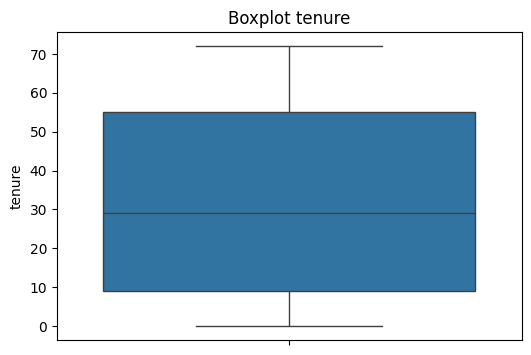

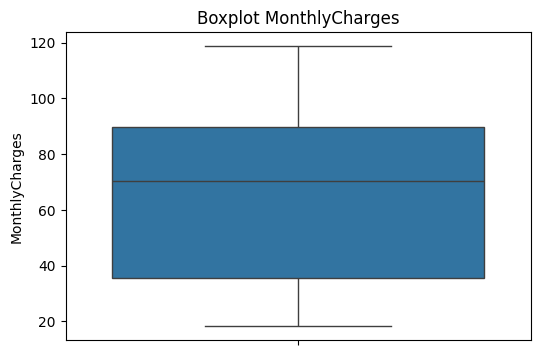

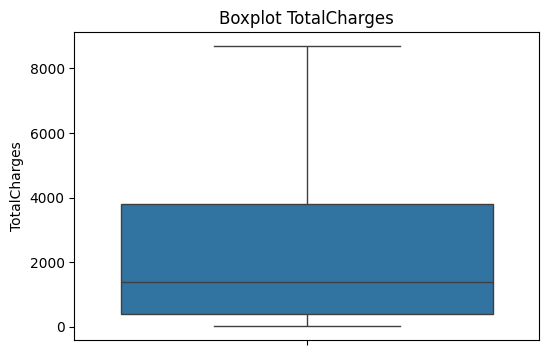

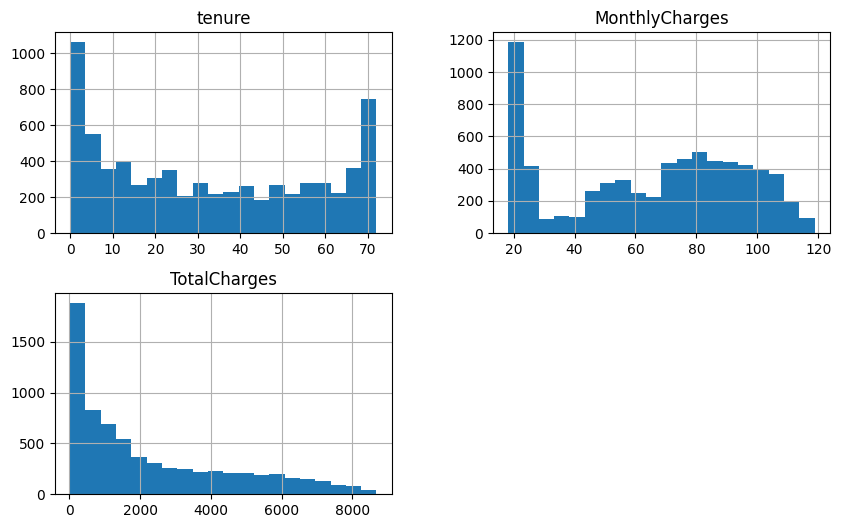

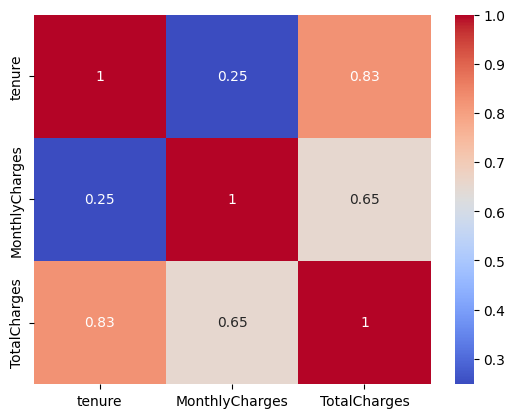

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,-1.277445,0,2,0,0,...,0,0,0,0,Month-to-month,1,2,-1.160323,-0.994194,0
1,5575-GNVDE,0,0,0,0,0.066327,1,0,0,1,...,1,0,0,0,One year,0,3,-0.259629,-0.173740,0
2,3668-QPYBK,0,0,0,0,-1.236724,1,0,0,1,...,0,0,0,0,Month-to-month,1,3,-0.362660,-0.959649,1
3,7795-CFOCW,0,0,0,0,0.514251,0,2,0,1,...,1,1,0,0,One year,0,0,-0.746535,-0.195248,0
4,9237-HQITU,1,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,Month-to-month,1,2,0.197365,-0.940457,1


In [1304]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Boxplot tiap fitur
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_encode[col])
    plt.title(f'Boxplot {col}')
    plt.show()

# Histogram
df_encode[num_cols].hist(bins=20, figsize=(10,6))
plt.show()

# Korelasi
sns.heatmap(df_encode[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

scaler_kmeans = StandardScaler()
X_scaledKmeans = scaler_kmeans.fit_transform(df_encode[num_cols])
df_encode[num_cols] = X_scaledKmeans

df_encode.head()

In [1305]:
df_KMeans = df_encode.copy()

In [1306]:
df_KMeans.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [1307]:
df_KMeans = df_KMeans.dropna()
df_KMeans.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


[21085.9517137058]
[21085.9517137058, 9695.52832027747]
[21085.9517137058, 9695.52832027747, 6596.353780969477]
[21085.9517137058, 9695.52832027747, 6596.353780969477, 4142.655444345033]
[21085.9517137058, 9695.52832027747, 6596.353780969477, 4142.655444345033, 3108.0211094491438]
[21085.9517137058, 9695.52832027747, 6596.353780969477, 4142.655444345033, 3108.0211094491438, 2789.496405742941]
[21085.9517137058, 9695.52832027747, 6596.353780969477, 4142.655444345033, 3108.0211094491438, 2789.496405742941, 2250.079211357883]
[21085.9517137058, 9695.52832027747, 6596.353780969477, 4142.655444345033, 3108.0211094491438, 2789.496405742941, 2250.079211357883, 1939.6585082202826]
[21085.9517137058, 9695.52832027747, 6596.353780969477, 4142.655444345033, 3108.0211094491438, 2789.496405742941, 2250.079211357883, 1939.6585082202826, 1638.0074706010066]
[21085.9517137058, 9695.52832027747, 6596.353780969477, 4142.655444345033, 3108.0211094491438, 2789.496405742941, 2250.079211357883, 1939.6585082

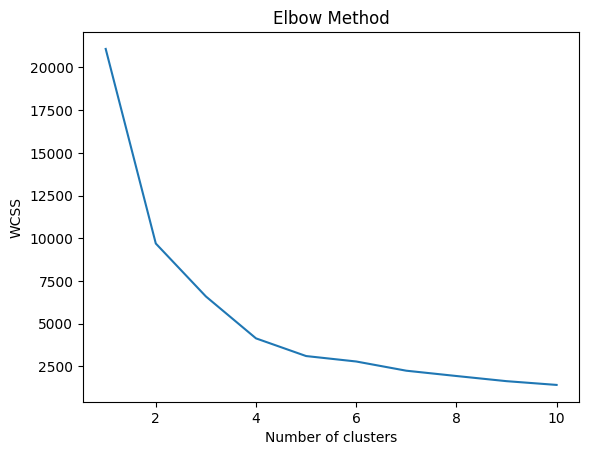

In [1308]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_KMeans[num_cols])
    wcss.append(kmeans.inertia_)

    print(wcss)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_KMeans['Cluster'] = kmeans.fit_predict(df_KMeans[num_cols])

joblib.dump(kmeans, 'kmeans_model.pkl')

print(df_KMeans)

      customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0     7590-VHVEG       1              0        1           0 -1.277445   
1     5575-GNVDE       0              0        0           0  0.066327   
2     3668-QPYBK       0              0        0           0 -1.236724   
3     7795-CFOCW       0              0        0           0  0.514251   
4     9237-HQITU       1              0        0           0 -1.236724   
...          ...     ...            ...      ...         ...       ...   
7038  6840-RESVB       0              0        1           1 -0.340876   
7039  2234-XADUH       1              0        1           1  1.613701   
7040  4801-JZAZL       1              0        1           1 -0.870241   
7041  8361-LTMKD       0              1        1           0 -1.155283   
7042  3186-AJIEK       0              0        0           0  1.369379   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              2   

In [1310]:
df_KMeans.groupby('Cluster')[num_cols].mean()

,tenure,MonthlyCharges,TotalCharges
Cluster,,,
0,1.103080,0.945954,1.435786
1,-0.900247,-1.096033,-0.873429
2,0.863409,-0.997759,-0.201281
3,-0.690723,0.532027,-0.456304


In [1311]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_KMeans[num_cols], df_KMeans['Cluster'])
score_rounded = round(score, 3)

print("Silhouette Score:", score_rounded)
if score_rounded >= 0.7:
    print("Cluster sangat baik, jelas terpisah")
elif score_rounded >= 0.5:
    print("Cluster cukup baik, masih bisa diterima")
elif score_rounded >= 0.25:
    print("Cluster lemah, mungkin tumpang tindih")
elif score_rounded >= 0:
    print("Cluster buruk, hampir tidak bermakna")
else:
    print("Data mungkin salah cluster")

Silhouette Score: 0.472
Cluster lemah, mungkin tumpang tindih


In [1312]:
df_KMeans.groupby('Cluster')['Churn'].mean()

,Churn
Cluster,
0,0.154650
1,0.247788
2,0.050260
3,0.482591


**LOGISTIC REGRESSION**

In [1313]:
from sklearn.feature_selection import SelectKBest, f_classif

In [1314]:
df_encode2 =df_clean.copy()

In [1315]:
le = LabelEncoder()
for col in categorical_cols:
  if col != 'Contract' and col not in cols_with_yes_no:
    df_encode2[col] = le.fit_transform(df_encode2[col])
  elif col in cols_with_yes_no:
    df_encode2[col] = df_encode2[col].map({'Yes': 1, 'No': 0})
    df_encode2[col] = df_encode2[col].fillna(2).astype(int)
  else :
    df_encode2['Contract'] = pd.Categorical(
    df_encode2['Contract'], categories=['Month-to-month', 'One year', 'Two year'],ordered=True)
    df_encode2['Contract'] = df_encode2['Contract'].cat.codes

In [1316]:
df_Logistic = df_encode2.copy()

In [1317]:
print(df_Logistic)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       1              0        1           0       1   
1     5575-GNVDE       0              0        0           0      34   
2     3668-QPYBK       0              0        0           0       2   
3     7795-CFOCW       0              0        0           0      45   
4     9237-HQITU       1              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       0              0        1           1      24   
7039  2234-XADUH       1              0        1           1      72   
7040  4801-JZAZL       1              0        1           1      11   
7041  8361-LTMKD       0              1        1           0       4   
7042  3186-AJIEK       0              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              2                0          

In [1318]:
df_Logistic = df_Logistic.dropna()
df_Logistic.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [1319]:
from sklearn.feature_selection import SelectKBest, f_classif
import joblib

def reduksi_data():
    # Pisahkan fitur dan target
    x = df_Logistic.drop(columns=['Churn', 'customerID', 'Contract'])
    y = df_Logistic['Churn']

    # Hapus kolom konstan
    x = x.loc[:, x.nunique() > 1]

    # Seleksi 3 fitur terbaik
    selector = SelectKBest(score_func=f_classif, k=3)
    X_new = selector.fit_transform(x, y)

    selected_features = x.columns[selector.get_support()].to_numpy()

    # Simpan selector untuk pipeline prediksi
    joblib.dump(selector, 'selector.pkl')

    return selected_features

reduksi_data()



array(['tenure', 'OnlineSecurity', 'TechSupport'], dtype=object)

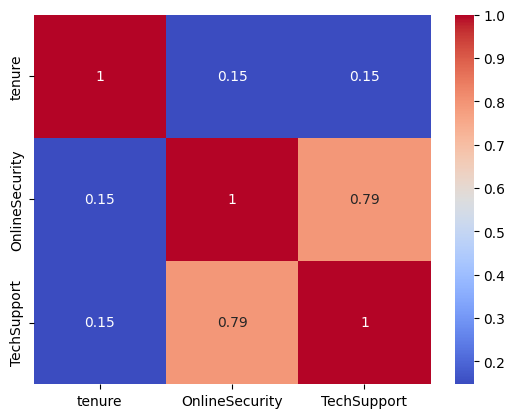

In [1320]:
# Korelasi
sns.heatmap(df_Logistic[reduksi_data()].corr(), annot=True, cmap='coolwarm')
plt.show()

In [1321]:
print(df_Logistic[reduksi_data()])

      tenure  OnlineSecurity  TechSupport
0          1               0            0
1         34               1            0
2          2               1            0
3         45               1            1
4          2               0            0
...      ...             ...          ...
7038      24               1            1
7039      72               0            0
7040      11               1            0
7041       4               0            0
7042      66               1            1

[7032 rows x 3 columns]


In [1322]:
X = df_Logistic[reduksi_data()]
y = df_Logistic['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [1323]:
from sklearn.preprocessing import StandardScaler

scaler_logistic = StandardScaler()
X_train_scaled = scaler_logistic.fit_transform(X_train)
X_test_scaled = scaler_logistic.transform(X_test)

In [1324]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
print(dict(zip(reduksi_data(), model.coef_[0])))

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


{'tenure': np.float64(-0.8735328116863997), 'OnlineSecurity': np.float64(-0.5435589344453139), 'TechSupport': np.float64(-0.4718995260713625)}
[[897 136]
 [192 182]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1033
           1       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



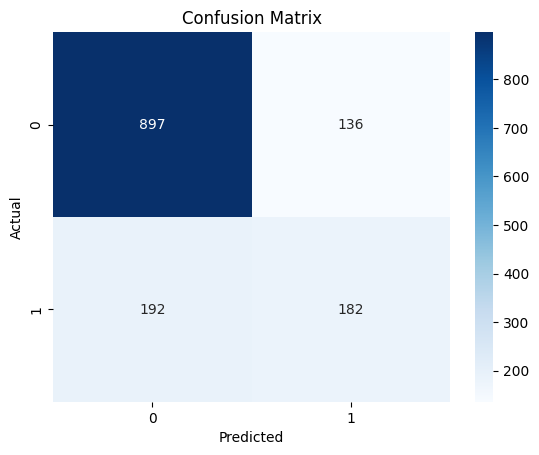

In [1325]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ROC-AUC Score: 0.6774878216709548


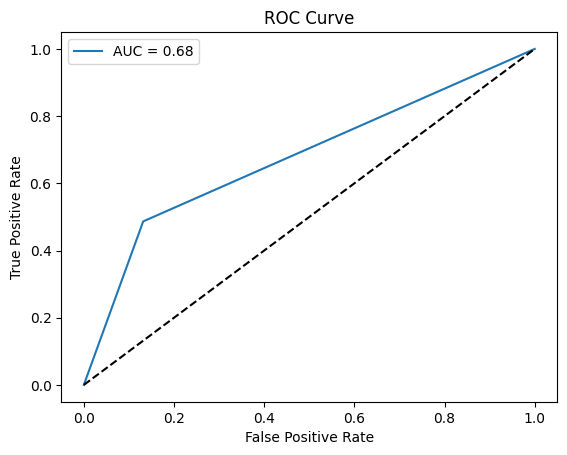

In [1326]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", auc)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [1327]:
with pd.ExcelWriter('Tubes_Kelompok_PenambanganData.xlsx') as writer:
    df_raw.to_excel(writer, sheet_name='Dataset', index=False)
    df_clean.to_excel(writer, sheet_name='Dataset Clean', index=False)
    df_encode.to_excel(writer, sheet_name='Dataset Encode', index=False)
    df_KMeans.to_excel(writer, sheet_name='K-Means Cluster', index=False)
    df_Logistic.to_excel(writer, sheet_name='Logistic Regression', index=False)

In [1328]:
# Simpan ke file
joblib.dump(model, 'logistic_model.pkl')

# Simpan scaler
joblib.dump(scaler_logistic, 'scaler.pkl')


['scaler.pkl']